<center><h1>TUTORIAL METABOLOMICS DATA ANALYSIS</h1>
May 2018 </center>


<center><h3>Classification of healthy individuals from patients with severe renal damage (tubulointerstitial lesions) by proton NMR measurements of urine samples.</h3></center>


In this tutorial you will use part of the NMR spectral data published by [Psihogios NG. et al (PMID: 17705523)](https://www.ncbi.nlm.nih.gov/pubmed/?term=17705523%5Buid%5D) paper can also be found on blackboard webpage) to discriminate between healthy individuals and patients suffering from severe renal damage also called tubulointerstitial lesions. The diagnoses were based on histopathological evaluation of renal biopsy. 
The purpose of the discrimination model is twofold: first we would like to know how well the classification model is able to classify new samples of healthy individuals or patients with renal damage. The second goal is to find which peaks in the NMR spectrum are mainly responsible for the discrimination between these two groups (the so called biomarkers). But before such a model can be made, several preprocessing steps are necessary to improve the “biological” content of the data.


In [3]:
%%python3
print("hallo")

ERROR: Error in parse(text = x, srcfile = src): <text>:1:1: unexpected SPECIAL
1: %%
    ^


In [6]:
library(dplyr)
library(IRdisplay)
library(R.utils)
sourceDirectory('MRPiP2')
sourceDirectory('pls')

**<u>Assignment</u>**  
Make a MS Word document that contains the questions and answers (including figures) for the exercises below. All questions and tasks will appear in bold italic font. The first page of this document should include the course name (Genomics in Disease), your name and student number and your email address are on the first page. You are allowed do the assignment together with one of your fellow students **BUT EACH OF YOU HAS TO HAND IN A REPORT**.

In [7]:
display_html(
'<script>  
code_show=true; 
function code_toggle() {
  if (code_show){
    $(\'div.input\').hide();
  } else {
    $(\'div.input\').show();
  }
  code_show = !code_show
}  
$( document ).ready(code_toggle);
</script>
  <form action="javascript:code_toggle()">
    <input type="submit" value="Click here to toggle on/off the raw code.">
 </form>'
)

## Data:  
The data was obtained from the MetaboAnalyst website: [www.metaboanalyst.ca].
The Proton NMR spectra of the urine samples were obtained on a 500MHz 1H NMR machine. The data were already automatically reduced using AMIX software to 244 buckets of 0.04 ppm corresponding to chemical shifts of 0.2-9.98 ppm. The area between 4.38 – 6.30 is excluded to remove any effect of variation due to water suppression resonance. 


### Read the data into memory (and view the header)

In [8]:
nmr_data <- read.csv("nmr_data", header=TRUE, sep=" ")
head(nmr_data)

Sample Class   X9.98    X9.94    X9.9     X9.86    X9.82    X9.78   X9.74  
1 P002   patient  0.00002  0.00002  0.00002  0.00002  0.00004 0.00002 0.00001
2 P012   patient -0.00003 -0.00003 -0.00003 -0.00001 -0.00001 0.00000 0.00003
3 P014   patient  0.00024  0.00017  0.00016  0.00018  0.00014 0.00015 0.00016
4 P027   patient  0.00009  0.00013  0.00009  0.00009  0.00014 0.00010 0.00014
5 P034   patient  0.00012  0.00015  0.00002  0.00003  0.00007 0.00007 0.00003
6 P037   patient  0.00001 -0.00001  0.00002 -0.00003 -0.00006 0.00006 0.00004
  X9.7    ⋯ X0.58   X0.54   X0.5     X0.46    X0.42    X0.38   X0.34   X0.3    
1 0.00000 ⋯ 0.00005 0.00015 -0.00005  0.00001 -0.00002 0.00000 0.00001 -0.00001
2 0.00003 ⋯ 0.00117 0.00097  0.00072  0.00057  0.00047 0.00035 0.00028  0.00027
3 0.00020 ⋯ 0.00026 0.00032  0.00027  0.00020  0.00018 0.00017 0.00024  0.00016
4 0.00016 ⋯ 0.00029 0.00028  0.00018  0.00014  0.00022 0.00017 0.00010  0.00011
5 0.00004 ⋯ 0.00035 0.00030  0.00021  0.00009  0.00009 0.00013 0.00005  0.00005
6 0.00006 ⋯ 0.00014 0.00007  0.00007 -0.00001  0.00004 0.00004 0.00005  0.00014
  X0.26    X0.22  
1  0.00002 0.00004
2  0.00029 0.00029
3  0.00015 0.00014
4  0.00010 0.00012
5 -0.00003 0.00004
6  0.00005 0.00013

### Make a vector that contains the classes as values -1 and 1.

In [9]:
Classes <- as.matrix(t(c(rep(-1,25),rep(1,25))))
Samples <- as.matrix(t(1:50))

### Make a dataset with only the spectral variables, and a vector with the variable names.

In [10]:
nmr <- as.matrix(nmr_data[,-1:-2])
Vars <- c(seq(9.98,6.3,by=-0.04),seq(4.38,0.22,by=-0.04))

### Plot the data  
Plot the spectra for each of the individuals. On the X-axis the individuals. Each line corresponds to a NMR spectra variable.

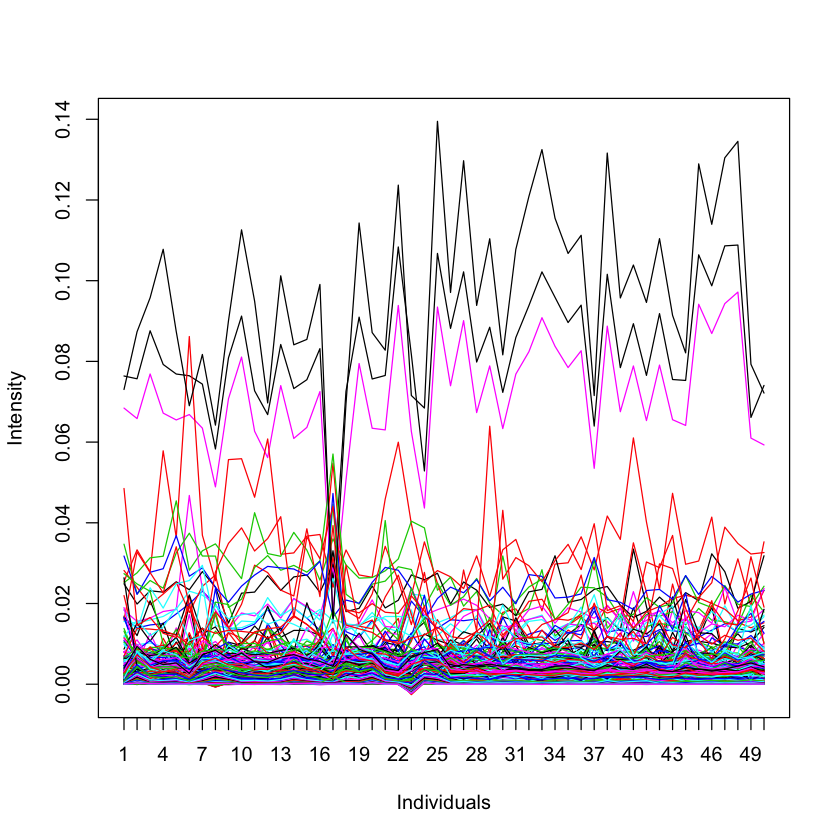

In [11]:
matplot(rownames(nmr),nmr, type = "l", lty = 1, xlab = "Individuals", ylab = "Intensity", xaxt="n")
axis(1,at=1:50)

### Question 1:  
Each curve shows the values for one bin over all individuals (Note 1:25 are patients and 26:50 are controls). Explain what you see in the figure and interpret. What did you expect, what did you not expect, what are strange phenomena in the plot?


This is the answer!

Now the NMR spectra will be plotted for all individuals. You can use three options on how to plot the spectra:

* Option 1, all individuals unique

In [15]:
ltyPerInd <- unlist(lapply(1:5, rep, times = 10))
colPerInd <- rainbow(n=10)

* Option 2, color per class

In [17]:
ltyPerInd <- 1
colPerInd <- (Classes+1)/2+1

* Option 3, focus on an individual. Fill in the rownumber of the individual on the dots.

In [13]:
Indiv <- c(1)
ltyPerInd <- 1
colPerInd <- rep(1,50)
colPerInd[Indiv] <- 2

Choose one of the three options above before you plot the spectra. Note that you have to indicate the specific individual in the last option. Now make the plot with the following command

In [18]:
matplot(Vars, t(nmr), xlim=c(11,0), ylim=c(), type = "l", lty = ltyPerInd,col = colPerInd, xlab = "NMR", ylab = "Intensity")
lines(c(10,0), c(0,0), col="grey") 
legend(x = "topleft", cex = 0.5, lty = ltyPerInd, col = colPerInd, rownames(nmr), ncol = 5)

### Question 2:
Note that the chemical shift (X-axis) is in reverse order. This is the normal way NMR spectra are plotted. Now 50 spectra are plotted on top of each other. Again some “strange” phenomena are visible. Comment on spectra of the previous. Each curve is the spectrum of an individual’s sample. When choosing the Color option **“Per Class”** interpret where you find the largest differences between the classes.

In [12]:
ltyPerInd <- 1
colPerInd <- (Classes+1)/2+1
matplot(Vars, t(nmr), xlim=c(11,0), ylim=c(), type = "l", lty = ltyPerInd,col = colPerInd, xlab = "NMR", ylab = "Intensity")
lines(c(10,0), c(0,0), col="grey") 
legend(x = "topleft", cex = 0.5, lty = ltyPerInd, col = colPerInd, rownames(nmr), ncol = 5)

### Preprocessing to clean up data
In steps below we will clean up the data. 
Question 3: After each step make a plot of the spectra (using option 1, 2, or 3) to observe the effect of the pretreatment step. Interpret the plots.
### Step 4a: 
Some values in the spectrum are negative. As this can become problematic in the calculations, remove negative parts and change them into 0. Due to baseline problems there are some spectra with negative numbers. These will be removed. In this way.

In [2]:
%%R
nmr[which(nmr < 0)] <- 0

ERROR: Error in parse(text = x, srcfile = src): <text>:1:1: unexpected SPECIAL
1: %%
    ^


### Step 4b: 
We normalize the data per individual.

In [14]:
nmr = nmr/apply(nmr,1,sum,na.rm=TRUE)

### Step 4c: 
Apply square root transformation to make the data more normally distributed.

In [15]:
nmr = nmr^(0.5)

## STEP 5 Perform PCA, data will be centered not scaled

In [16]:
nmrpca = prcomp(nmr, retx = TRUE, center = TRUE, scale. = FALSE)

#### Plot the scores

In [17]:
scoreplot(nmrpca,comps=1:2,Samples,type = "p",xlab = "PC1",ylab = "PC2")